# **Data Analysis with Google Colab**

## **Introduction**

This notebook provides a template for data analysis using Google Colab. The notebook walks through the steps of:
1. Uploading a Google Sheet from Google Drive.
2. Performing data cleaning.
3. Conducting a linear regression analysis.

This notebook will serve as a reference, so feel free to revisit it anytime.

For this workbook we'll be using the [Movies](https://docs.google.com/spreadsheets/d/1DQ6xFmmZYCwIJZiUgD9n3Pp1xRaAE7zEkj7It1iV5eA/edit?usp=sharing) dataset.

## **1. Uploading a Google Sheet from Google Drive**

To work with data stored in Google Sheets, we need to connect our Colab environment to Google Drive.

**Step 1: Authenticate and Connect to Google Drive**

In [ ]:
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd
import numpy as np

# Authenticate and create the PyDrive client
auth.authenticate_user()

# Connect to Google Sheets
gc = gspread.authorize(default()[0])

**Step 2: Load Data from a Google Sheet**

1.	Go to your Google Sheet, and in the URL, find the sheet_id:

  *   Example URL: https://docs.google.com/spreadsheets/d/your_sheet_id/edit#gid=0

  *   The sheet_id is the part that comes after /d/ and before /edit.
2.	Replace 'your_sheet_id' in the code below with your actual sheet ID.

In [ ]:
# Replace 'your_sheet_id' with your actual Google Sheet ID
sheet_id = '1JEy6T39LCrxuTY0Aqu4dNBj3XckT34uzHQxhR0HyKJU'
sheet = gc.open_by_key(sheet_id)

# Select the first sheet (worksheet) in the Google Sheet
worksheet = sheet.get_worksheet(0)

# Convert the worksheet to a pandas DataFrame
data = pd.DataFrame(worksheet.get_all_records())

## **2. Data Cleaning**

Once the data is loaded into a DataFrame, we can clean it. This involves handling missing values, removing duplicates, and ensuring data types are correct.

**Step 1: Overview of the Data**

In [ ]:

#Modify display settings to show all rows
#pd.set_option('display.max_rows', None)
#print(data)
data.head()

,No,STUDENTS_NAME,UFA Reg No,Time taken,Final Theory,Practical(A) out of 80,Oral Exam out of 20,Final Practical,Final Icare (Theory + Practical),Hospital Internship Score,...,Branch,Course,Month Of Class,Type of Class,Status,School Internship attended,School Internship score,Date sent for Printing,Received Status,Certificate Number
0,1,Jacinta Onono,449,,,,,,,,...,Nairobi,Eldercare,May,Afternoon,Graduated,,,,,#REF!
1,2,Grace Njenga,451,,,,,,,,...,Nairobi,Eldercare,May,Afternoon,Graduated,,,,,#REF!
2,3,Esther Nasimiyu,452,,,,,,,,...,Nairobi,Eldercare,May,Afternoon,Graduated,,,,,#REF!
3,4,Hannah Karuga,453,,,,,,,,...,Nairobi,Eldercare,May,Afternoon,Graduated,,,,,#REF!
4,5,Nancy Gitonga,454,,,,,,,,...,Nairobi,Eldercare,May,Afternoon,Graduated,,,,,#REF!


**Step 2: Handling Missing Values**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 No                                  0
STUDENTS_NAME                       0
UFA Reg No                          0
Time taken                          0
Final Theory                        0
Practical(A) out of 80              0
Oral Exam out of 20                 0
Final Practical                     0
Final Icare (Theory + Practical)    0
Hospital Internship Score           0
Final Score                         0
Final Grade                         0
ID Numbers                          0
Hospital Internship Attended        0
Start Date of Class                 0
End Date of Class                   0
Class ID                            0
Year                                0
Branch                              0
Course                              0
Month Of Class                      0
Type of Class                       0
Status                              0
School Internship attended          0
School Internship score             0
Date sent for Prin

In [ ]:
# Correct any typos or case mismatches in the list of columns to drop
columns_to_drop = ['No','Time taken','ID Numbers', 'School Internship attended',
                   'School Internship score', 'Date sent for Printing', 'Received Status',
                   'Certificate Number']  # Make sure these match exactly

# Drop the columns
data = data.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to skip non-existent columns

In [ ]:
# Check for empty values
#empty_strings = (data == '').sum()
#print("Empty strings in each column:\n", empty_strings)
#data.replace('', np.nan, inplace=True)
data.head()

,STUDENTS_NAME,UFA Reg No,Final Theory,Practical(A) out of 80,Oral Exam out of 20,Final Practical,Final Icare (Theory + Practical),Hospital Internship Score,Final Score,Final Grade,Hospital Internship Attended,Start Date of Class,End Date of Class,Class ID,Year,Branch,Course,Month Of Class,Type of Class,Status
0,Jacinta Onono,449,,,,,,,,Pass,National Spinal Injury Referral Hospital,5/3/21,7/28/21,,2021,Nairobi,Eldercare,May,Afternoon,Graduated
1,Grace Njenga,451,,,,,,,,Credit,National Spinal Injury Referral Hospital,5/3/21,7/28/21,,2021,Nairobi,Eldercare,May,Afternoon,Graduated
2,Esther Nasimiyu,452,,,,,,,,Pass,Gurunanak Hospital,5/3/21,7/28/21,,2021,Nairobi,Eldercare,May,Afternoon,Graduated
3,Hannah Karuga,453,,,,,,,,Pass,Gurunanak Hospital,5/3/21,7/28/21,,2021,Nairobi,Eldercare,May,Afternoon,Graduated
4,Nancy Gitonga,454,,,,,,,,Pass,Gurunanak Hospital,5/3/21,7/28/21,,2021,Nairobi,Eldercare,May,Afternoon,Graduated


In [ ]:
data.dtypes

,0
STUDENTS_NAME,object
UFA Reg No,object
Final Theory,object
Practical(A) out of 80,object
Oral Exam out of 20,object
Final Practical,object
Final Icare (Theory + Practical),object
Hospital Internship Score,object
Final Score,object
Final Grade,object


In [ ]:
data['Practical(A) out of 80'] = pd.to_numeric(data['Practical(A) out of 80'],errors='coerce')
data['Oral Exam out of 20'] = pd.to_numeric(data['Oral Exam out of 20'],errors='coerce')
data['Final Practical'] = pd.to_numeric(data['Final Practical'],errors='coerce')
data['Final Icare (Theory + Practical)'] = pd.to_numeric(data['Final Icare (Theory + Practical)'],errors='coerce')
data['Hospital Internship Score'] = pd.to_numeric(data['Hospital Internship Score'],errors='coerce')
data['Final Score'] = pd.to_numeric(data['Final Score'], errors='coerce')

In [ ]:
data.dtypes

,0
STUDENTS_NAME,object
UFA Reg No,object
Final Theory,object
Practical(A) out of 80,float64
Oral Exam out of 20,float64
Final Practical,float64
Final Icare (Theory + Practical),float64
Hospital Internship Score,float64
Final Score,float64
Final Grade,object


In [ ]:
# Step 2: Calculate the median (skip NaN)
median_value = data['Practical(A) out of 80'].median()
median_value = data['Oral Exam out of 20'].median()
median_value = data['Final Practical'].median()
median_value = data['Final Icare (Theory + Practical)'].median()
median_value = data['Hospital Internship Score'].median()
median_value = data['Final Score'].median()

In [ ]:
# Step 3: Fill NaN with the median value
data['Practical(A) out of 80'] = data['Practical(A) out of 80'].fillna(median_value)
data['Oral Exam out of 20'] = data['Oral Exam out of 20'].fillna(median_value)
data['Final Practical'] = data['Final Practical'].fillna(median_value)
data['Final Icare (Theory + Practical)'] = data['Final Icare (Theory + Practical)'].fillna(median_value)
data['Hospital Internship Score'] = data['Hospital Internship Score'].fillna(median_value)
data['Final Score'] = data['Final Score'].fillna(median_value)

In [ ]:
# Step 4: Convert the column to integer data type
data['Practical(A) out of 80'] = data['Practical(A) out of 80'].astype(int)
data['Oral Exam out of 20'] = data['Oral Exam out of 20'].astype(int)
data['Final Practical'] = data['Final Practical'].astype(int)
data['Final Icare (Theory + Practical)'] = data['Final Icare (Theory + Practical)'].astype(int)
data['Hospital Internship Score'] = data['Hospital Internship Score'].astype(int)
data['Final Score'] = data['Final Score'].astype(int)

In [ ]:
# Option 1: Drop rows with missing values
#data_cleaned = data.dropna()
# Option 2: Fill missing values with a default value (e.g., the mean)
#data_cleaned = data.fillna(data.mean())

In [ ]:
data.head()


,STUDENTS_NAME,UFA Reg No,Final Theory,Practical(A) out of 80,Oral Exam out of 20,Final Practical,Final Icare (Theory + Practical),Hospital Internship Score,Final Score,Final Grade,Hospital Internship Attended,Start Date of Class,End Date of Class,Class ID,Year,Branch,Course,Month Of Class,Type of Class,Status
0,Jacinta Onono,449,,84,84,84,84,84,84,Pass,National Spinal Injury Referral Hospital,5/3/21,7/28/21,,2021,Nairobi,Eldercare,May,Afternoon,Graduated
1,Grace Njenga,451,,84,84,84,84,84,84,Credit,National Spinal Injury Referral Hospital,5/3/21,7/28/21,,2021,Nairobi,Eldercare,May,Afternoon,Graduated
2,Esther Nasimiyu,452,,84,84,84,84,84,84,Pass,Gurunanak Hospital,5/3/21,7/28/21,,2021,Nairobi,Eldercare,May,Afternoon,Graduated
3,Hannah Karuga,453,,84,84,84,84,84,84,Pass,Gurunanak Hospital,5/3/21,7/28/21,,2021,Nairobi,Eldercare,May,Afternoon,Graduated
4,Nancy Gitonga,454,,84,84,84,84,84,84,Pass,Gurunanak Hospital,5/3/21,7/28/21,,2021,Nairobi,Eldercare,May,Afternoon,Graduated


In [ ]:
# @title **Decide on a strategy: remove or fill missing data**

# Example: Dropping observations with missing values in critical columns
#critical_columns = ['Final Icare (Theory + Practical)', 'Hospital Internship Score', 'Hospital Internship Attended']
#students_dropped = students_df.dropna(subset=critical_columns)


# Example: Fill missing values with a specific strategy (e.g., mean for numerical, mode for categorical)
#data_filled = data.fillna({
 #   'Final Icare (Theory + Practical)': data['Final Icare (Theory + Practical)'].median(),
  #  'Hospital Internship Score': data['Hospital Internship Score'].median(),
   # 'Hospital Internship Attended': data['Hospital Internship Attended'].mode()[0],
#})

    # Add other columns as needed
# Fill missing values with a specific value
# students_filled = students_filled.fillna(0) //fill math score with zero

**Step 3: Removing Duplicates and Drop Unnecessary Columns**

In [ ]:
#data_filled.duplicated().sum()

**Step 4: Data Type Conversion (if needed)**

In [ ]:
#data_filled.dtypes

In [ ]:
# Convert columns to appropriate data types
#data_filled['Hospital Internship Score'] = data_filled['Hospital Internship Score'].astype(int)

In [ ]:
#data_filled.dtypes

## **3. Linear Regression Analysis**

Now that the data is cleaned, we can perform a linear regression analysis.

**Step 1: Select Features and Target Variable**

In [ ]:
# Assuming 'X' is the feature and 'y' is the target variable. This means we want
# to see how much X predicts y.
X = data['Final Icare (Theory + Practical)']
y = data['Hospital Internship Score']

**Step 2: Split Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 3: Perform Linear Regression**

In [ ]:
#from sklearn.linear_model import LinearRegression

# Create a linear regression model
#model = LinearRegression()

# Train the model on the training data
#model.fit(X_train, y_train)

#Make predictions on the testing data
#y_pred = model.predict(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'X' is the feature and 'y' is the target variable. This means we want
# to see how much X predicts y.
X = data['Final Icare (Theory + Practical)']
y = data['Hospital Internship Score']

# Reshape X to be a 2D array
X = X.values.reshape(-1, 1)  # -1 means infer the number of rows

X

array([[84],
       [84],
       [84],
       ...,
       [84],
       [84],
       [84]])

**Step 4: Evaluate the Model**

Below are explanations for **R-squared** and **Mean Squared Error (MSE)**.

#### **R-squared (R²)**

**What is R-squared?**
R-squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent (target) variable that is predictable from the independent (predictor) variables. In simpler terms, it tells you how well your model explains the variability of the target variable based on the input features.

**How to Interpret R-squared?**
- **R-squared = 1**: The model perfectly explains all the variability of the target variable. This is the ideal scenario, but it's rare in practice.
- **R-squared = 0**: The model does not explain any of the variability of the target variable. This means the model fails to capture the relationship between the predictors and the target.
- **R-squared between 0 and 1**: The model explains a certain percentage of the variability. For example, an R-squared of 0.75 means that 75% of the variability in the target variable can be explained by the model, while the remaining 25% is unexplained.

**Why is R-squared Important?**
R-squared gives you an idea of the goodness of fit of your model. A higher R-squared value generally indicates a better fit, but it’s important to note that a very high R-squared might also suggest overfitting, especially in complex models.

---

#### **Mean Squared Error (MSE)**

**What is Mean Squared Error?**
Mean Squared Error (MSE) is a measure of the average squared difference between the actual values and the values predicted by your model. It calculates the error by taking the difference between each actual and predicted value, squaring it, and then averaging these squared differences.

**How to Interpret MSE?**
- **Lower MSE**: Indicates that the model’s predictions are closer to the actual values, meaning the model is performing well.
- **Higher MSE**: Suggests that the predictions are far from the actual values, meaning the model may not be capturing the underlying relationship well.

**Why is MSE Important?**
MSE gives you a sense of the accuracy of your model’s predictions. Since it squares the differences between actual and predicted values, it penalizes larger errors more heavily, making it a sensitive measure of model performance. However, it’s important to remember that MSE is in the units of the target variable squared, which can make interpretation tricky if you're comparing models or datasets.

**Key Difference Between MSE and R-squared:**
- **MSE** is an absolute measure of prediction error in the original units of the target variable.
- **R-squared** is a relative measure that tells you the proportion of variance explained by the model.

Both R-squared and MSE are critical metrics for evaluating the performance of a linear regression model, and together they provide a comprehensive picture of how well your model is doing.

In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
#mse = mean_squared_error(y_test, y_pred)
#print(f"Mean Squared Error: {mse}")

# Calculate R-squared
#r2 = r2_score(y_test, y_pred)
#print(f"R-squared: {r2}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'X' is the feature and 'y' is the target variable. This means we want
# to see how much X predicts y.
X = data['Hospital Internship Score']
y = data['Final Icare (Theory + Practical)']

# Reshape X to be a 2D array
X = X.values.reshape(-1, 1)  # -1 means infer the number of rows

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data, with 20% for testing

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 20.113609728553218
R-squared: 0.0004822256165548655


**Step 5: Visualize the Results**

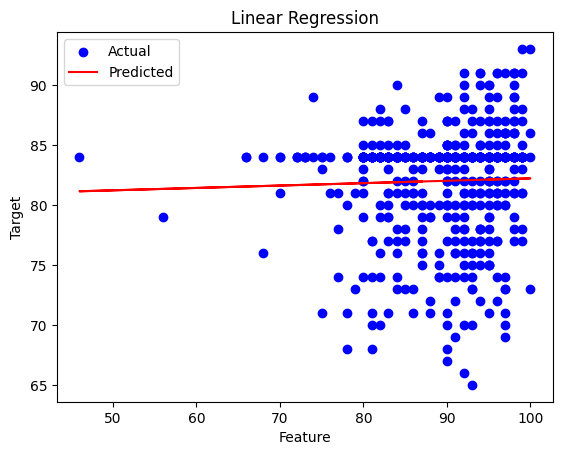

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

## **4. Advanced: Multi-variate Linear Regression Analysis**

Now that we've done basic linear regression analysis with one x and one y variable ("how does x predict y?"), we'll see how to use multiple x variables to predict.

**Step 1: Select Features and Target Variable**

In [ ]:
# Assuming 'X' is the feature and 'y' is the target variable. This means we want
# to see how much X predicts y.
data = pd.get_dummies(data, columns=['Hospital Internship Attended'], drop_first=True)
X = data[['Hospital Internship Score'] + [col for col in data.columns if 'Hospital Internship Attended' in col]]
y = data['Final Icare (Theory + Practical)']


**Step 2: Split Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 3: Perform Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

**Step 4: Evaluate the Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 18.787288232233255
R-squared: 0.06639192198680488


**Step 5: Visualize the Results**

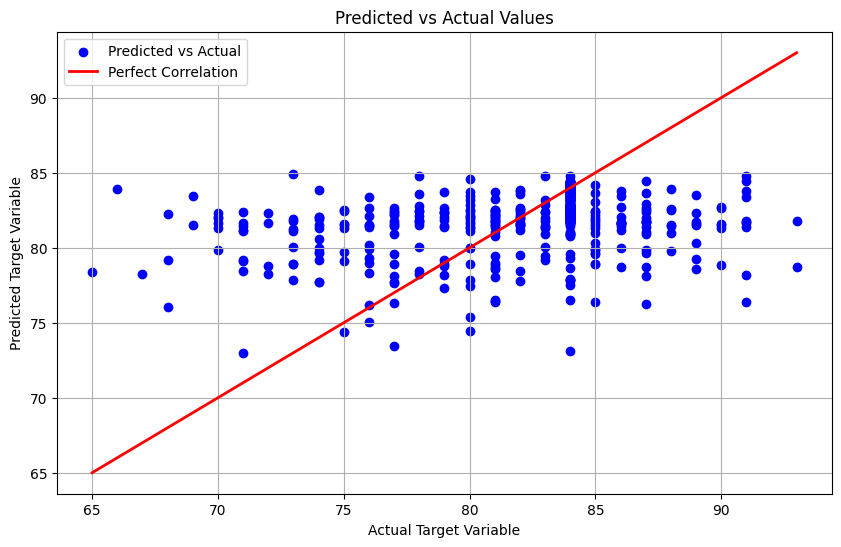

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Correlation')
plt.xlabel('Actual Target Variable')
plt.ylabel('Predicted Target Variable')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()